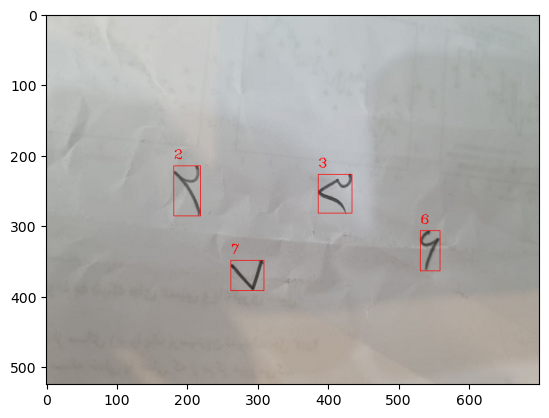

In [1]:
# Alireza Kia 
"""KNN have never used on images
because distance metrics on level
of whole images can be very unintuitive"""
# Its just training code

import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
from sklearn.neighbors import KNeighborsClassifier

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('dataset/Data_hoda_full.mat')

    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])
    
    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,size**2])
    X_test = np.reshape(X_test_5by_5, [-1,size**2])
    
    return X_train, y_train, X_test, y_test

# dataset = io.loadmat('dataset/Data_hoda_full.mat')

X_train, y_train, X_test, y_test = load_hoda()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

gray = cv2.imread("persian-digits.jpg", 0) # cv2.IMREAD_GRAYSCALE instead of 0
img_color = cv2.imread("persian-digits.jpg")

gray[gray < 127.5] = 0
gray[gray > 127.5] = 255
gray = 255 - gray
#cv2.threshold(gray, 127.5, 255, cv2.THRESH_BINARY_INV)

nlabls, labels, stats, _ = cv2.connectedComponentsWithStats(gray, connectivity = 8)

for i in range(1, nlabls):
    x, y, w, h = stats[i][:4]
    if w > 5 and h > 5:
        
        cropped = gray[y:y+h, x:x+w]
        resized = cv2.resize(cropped, (5, 5))
        features = np.reshape(resized, (1, 25))
        r = neigh.predict(features)[0]
        
        cv2.putText(img_color, str(r), (int(x), int(y)-10),
                    cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 1)
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 1)

plt.imshow(img_color[:, :, ::-1])